#### Loading Data file and observing properties of the data

In [124]:
import pandas as pd
import numpy as np

In [125]:
data = pd.read_csv(r'Data/breast-cancer-wisconsin.data.txt')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


#### Dataframe is given meaninful names

In [126]:
cl_names = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
data.columns = cl_names

print(data.dtypes)

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


#### "Bare_Nuclei" column is observed to be having a different data type. Chcking for misssing or null values in data

In [127]:
print(data.isnull().sum())

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


#### Since there are missing values as '?' those to be repleace with null

In [128]:
data.replace(to_replace='?', value=np.nan, inplace=True)

#### Null values are imputed using Univariate, by substituting null value with most frequent value for that feature

In [129]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_cleaned = pd.DataFrame(imp.fit_transform(data))
data_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [130]:
data_cleaned.columns = data.columns
print(data_cleaned.dtypes)

Sample_code_number             object
Clump_Thickness                object
Uniformity_of_Cell_Size        object
Uniformity_of_Cell_Shape       object
Marginal_Adhesion              object
Single_Epithelial_Cell_Size    object
Bare_Nuclei                    object
Bland_Chromatin                object
Normal_Nucleoli                object
Mitoses                        object
Class                          object
dtype: object


#### Data types of the data frame are converted back to original data type Int64

In [131]:
data_cleaned = data_cleaned.astype(np.int64)

print(data_cleaned.dtypes)
data_cleaned.describe()

Sample_code_number             int64
Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.489971,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.623301,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### It is assured whether any null values are still there

In [132]:
print(data_cleaned.isnull().any())

Sample_code_number             False
Clump_Thickness                False
Uniformity_of_Cell_Size        False
Uniformity_of_Cell_Shape       False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                    False
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool


In [133]:
data_cleaned.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


#### 'Sample_code_number' feature is removed from data set as it does not represent a real feature.

In [134]:
data_cleaned.drop(columns='Sample_code_number', inplace=True, axis=1)

#### Data set is divided to features and classes, then splitted to training and test sets.

In [135]:
x = data_cleaned.iloc[:,:-1]
y = data_cleaned.iloc[:, -1]

In [136]:
from sklearn.model_selection import train_test_split

test_size = 244/(455+244)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

## Naive Bayes classification algorithm

In [137]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)

#### classification_report used to generate precision, recall, f1 and support scores

In [138]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.99      0.95      0.97       150
   Malignant       0.92      0.99      0.95        94

   micro avg       0.96      0.96      0.96       244
   macro avg       0.96      0.97      0.96       244
weighted avg       0.97      0.96      0.96       244



#### Confusion matrix and accuracy score is canculated

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Confusion matrix: true positives-{}, true negatives-{}, false positives-{}, false negatives-{}, ".format(tp, tn, fp, fn))
print("Accuracy =", accuracy_score(y_test, y_pred, normalize=True))

Confusion matrix: true positives-93, true negatives-142, false positives-8, false negatives-1, 
Accuracy = 0.9631147540983607


## LVQ Algorithm

In [140]:
data_cleaned.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.489971,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,3.623301,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Since all above features are valued from 1 to 10, feature scalling is Not done.


**Note: In order to run below code it may required to have insatalled  sklearn-lvq. Run>> pip install sklearn-lvq**

### Generalized Learning Vector Quantization(GLVQ) library from sktlearn_lvq is used

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98       150
   Malignant       0.95      0.98      0.96        94

   micro avg       0.97      0.97      0.97       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244

not implemented!


C:\Users\waruna-pc\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


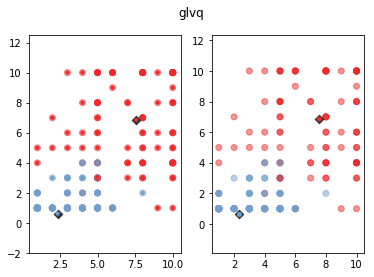

Confusion matrix: true positives-92, true negatives-145, false positives-5, false negatives-2, 
classification accuracy: 0.9713114754098361


In [141]:
from sklearn_lvq import GlvqModel
import matplotlib.pyplot as plt
from sklearn_lvq.utils import plot2d

glvq = GlvqModel()
glvq.fit(x_train, y_train)

y_predLVQ = glvq.predict(x_test)

print(classification_report(y_test, y_predLVQ, target_names=['Benign', 'Malignant']))

plot2d(glvq, x_test, y_predLVQ, 1, 'glvq')
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_predLVQ).ravel()

print("Confusion matrix: true positives-{}, true negatives-{}, false positives-{}, false negatives-{}, ".format(tp, tn, fp, fn))
print('classification accuracy:', glvq.score(x_test, y_test))
